In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Clean and save raw data

In [29]:
# adj_cases = (total_cases / adjpop) * 100000
raw_data = pd.read_csv("../data/csvs/rawdata.csv")

In [30]:
raw_data.head()

,id,longitude,latitude,total_cases,voronoi_pop,nbHF,voronoi_adj_pop,sampling,provnames,access,pet,pop,urban,W_access
0,1,109.5792,18.29187,4.0,294324.531250,1,294324.531250,1,Hainan,-0.625080,1.346743,2.067364,1.284664,2.655904
1,2,109.7180,18.36956,2.0,73959.992188,1,73959.992188,1,Hainan,NaN,NaN,NaN,NaN,NaN
2,3,109.4197,18.39084,60.0,218175.828125,1,218175.828125,1,Hainan,-0.737850,1.160834,0.871805,0.716921,2.674515
3,4,109.9475,18.56796,6.0,322905.031250,1,322905.031250,1,Hainan,-0.523366,1.269342,1.113280,0.613657,2.634486
4,5,109.0491,18.65009,4.0,465194.500000,1,465194.500000,1,Hainan,-1.265526,1.233569,0.818068,0.533877,2.691532


In [31]:
raw_tc_non_na = raw_data.query('not total_cases.isna()')
raw_tc_non_na.isna().sum()

id                 0
longitude          0
latitude           0
total_cases        0
voronoi_pop        0
nbHF               0
voronoi_adj_pop    0
sampling           0
provnames          0
access             3
pet                3
pop                3
urban              3
W_access           3
dtype: int64

In [32]:
raw_tc_non_na.describe()

,id,longitude,latitude,total_cases,voronoi_pop,nbHF,voronoi_adj_pop,sampling,access,pet,pop,urban,W_access
count,622.000000,622.000000,622.000000,622.000000,6.220000e+02,622.000000,6.220000e+02,622.0,619.000000,619.000000,619.000000,619.000000,619.000000
mean,307.369775,113.070027,32.630025,66.220257,2.282551e+06,1.025723,2.255768e+06,1.0,-1.130183,0.184605,1.413461,1.178565,-0.834449
std,176.924945,7.365631,6.739583,541.267944,2.056447e+06,0.158437,2.047562e+06,0.0,0.817551,0.550108,0.949813,1.063968,0.910873
min,1.000000,82.096900,18.291870,1.000000,1.699957e+04,1.000000,1.699957e+04,1.0,-3.487341,-1.508443,-1.531307,-0.482502,-3.676348
25%,155.250000,108.482375,27.644925,4.000000,8.043289e+05,1.000000,7.766553e+05,1.0,-1.737318,-0.173947,0.739138,0.547064,-1.288149
50%,307.500000,113.449250,31.931155,10.000000,1.629042e+06,1.000000,1.629042e+06,1.0,-1.062163,0.235193,1.303326,1.207361,-0.942243
75%,459.750000,118.011500,36.821695,32.000000,3.044448e+06,1.000000,3.035009e+06,1.0,-0.534990,0.570786,1.995453,1.835421,-0.520428
max,614.000000,132.546400,49.717850,13243.000000,1.390106e+07,2.000000,1.390106e+07,1.0,1.015821,2.789949,4.630500,4.335167,2.691532


In [33]:
raw_tc_na = raw_data.query('total_cases.isna()')
raw_tc_na.isna().sum()

id                    0
longitude             0
latitude              0
total_cases        1699
voronoi_pop           0
nbHF                  0
voronoi_adj_pop       0
sampling              0
provnames             0
access                0
pet                   0
pop                   5
urban                 0
W_access              0
dtype: int64

In [34]:
raw_tc_na.describe()

,id,longitude,latitude,total_cases,voronoi_pop,nbHF,voronoi_adj_pop,sampling,access,pet,pop,urban,W_access
count,1699.000000,1699.000000,1699.000000,0.0,1.699000e+03,1699.000000,1.699000e+03,1699.0,1699.000000,1699.000000,1694.000000,1699.000000,1699.000000
mean,388.479694,100.891860,37.720877,NaN,2.133903e+06,1.000589,2.131977e+06,0.0,0.313555,-0.052204,-0.358949,-0.171903,0.313385
std,153.811064,14.654451,6.927460,NaN,2.224545e+06,0.024261,2.222139e+06,0.0,0.910335,1.117432,0.838543,0.599131,0.847265
min,22.000000,77.645833,21.395833,NaN,1.699957e+04,1.000000,1.699957e+04,0.0,-2.584068,-3.256338,-1.974678,-0.482502,-3.025917
25%,329.000000,88.270833,32.645833,NaN,6.306898e+05,1.000000,6.306898e+05,0.0,-0.284406,-0.875462,-0.920098,-0.482502,-0.204242
50%,393.000000,98.895833,38.270833,NaN,1.637106e+06,1.000000,1.637106e+06,0.0,0.311229,-0.168122,-0.338573,-0.482502,0.312922
75%,483.500000,112.645833,42.645833,NaN,2.278123e+06,1.000000,2.278123e+06,0.0,0.928701,0.835339,0.176954,-0.482502,0.867984
max,614.000000,134.520833,52.645833,NaN,1.390106e+07,2.000000,1.390106e+07,0.0,3.444752,3.466190,2.510498,2.450761,3.672449


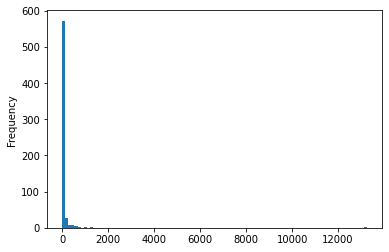

In [35]:
raw_tc_non_na["total_cases"].plot.hist(bins=100)

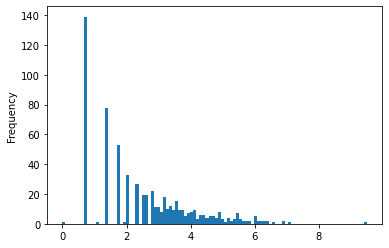

In [36]:
np.log(raw_tc_non_na["total_cases"]).plot.hist(bins=100)

In [37]:
# all values of total cases above 95 Percentile of acces are NAs
raw_data.query("access >= access.quantile(0.95)").isna().sum()

id                   0
longitude            0
latitude             0
total_cases        116
voronoi_pop          0
nbHF                 0
voronoi_adj_pop      0
sampling             0
provnames            0
access               0
pet                  0
pop                  0
urban                0
W_access             0
dtype: int64

In [38]:
# replace total_cases NaN values with 0 values, when access is higher than 95 Percentile of access values
raw_data_with_zeros = raw_data.copy()
raw_data_with_zeros["total_cases"] = np.where(raw_data_with_zeros["access"] >= raw_data_with_zeros["access"].quantile(0.95), 0, raw_data_with_zeros["total_cases"])

# number of zero values
print("Number of total_cases = 0:", len(raw_data_with_zeros.query("total_cases == 0")))


Number of total_cases = 0: 116


In [39]:
raw_data_with_zeros.query("total_cases == 0").head()

,id,longitude,latitude,total_cases,voronoi_pop,nbHF,voronoi_adj_pop,sampling,provnames,access,pet,pop,urban,W_access
354,181,90.145833,30.145833,0.0,2110784.00,1,2110784.00,0,Xizang,1.692769,-2.092401,-0.346779,-0.482502,0.825996
372,181,91.395833,33.270833,0.0,2110784.00,1,2110784.00,0,Qinghai,1.821902,-1.819417,-1.611045,-0.482502,0.614882
393,181,92.645833,32.645833,0.0,2110784.00,1,2110784.00,0,Xizang,1.749758,-1.581937,-0.421769,-0.482502,0.576491
400,181,93.270833,29.520833,0.0,2110784.00,1,2110784.00,0,Xizang,1.727767,-1.793981,-0.615617,-0.482502,1.085963
499,210,101.395833,31.395833,0.0,1809830.75,1,1809830.75,0,Sichuan,1.708953,-1.788534,-0.099741,-0.482502,0.220027


In [40]:
raw_data_with_zeros.query("total_cases >= 0").isna().sum()

id                 0
longitude          0
latitude           0
total_cases        0
voronoi_pop        0
nbHF               0
voronoi_adj_pop    0
sampling           0
provnames          0
access             3
pet                3
pop                3
urban              3
W_access           3
dtype: int64

In [41]:
raw_data_with_zeros.describe()

,id,longitude,latitude,total_cases,voronoi_pop,nbHF,voronoi_adj_pop,sampling,access,pet,pop,urban,W_access
count,2321.000000,2321.000000,2321.000000,738.000000,2.321000e+03,2321.000000,2.321000e+03,2321.000000,2318.000000,2318.000000,2313.000000,2318.000000,2318.000000
mean,366.743214,104.155462,36.356590,55.811653,2.173739e+06,1.007324,2.165151e+06,0.267988,-0.071982,0.011034,0.115379,0.188727,0.006867
std,164.271174,14.170567,7.236574,497.433989,2.181325e+06,0.085287,2.176985e+06,0.443007,1.092585,1.003377,1.171334,0.960270,1.002680
min,1.000000,77.645833,18.291870,0.000000,1.699957e+04,1.000000,1.699957e+04,0.000000,-3.487341,-3.256338,-1.974678,-0.482502,-3.676348
25%,225.000000,91.395833,30.968950,2.000000,6.697265e+05,1.000000,6.697265e+05,0.000000,-0.808616,-0.679072,-0.701768,-0.482502,-0.703669
50%,390.000000,105.145833,36.395833,6.000000,1.637106e+06,1.000000,1.637106e+06,0.000000,-0.022139,0.011067,0.000539,-0.482502,0.003702
75%,481.000000,116.228500,41.970320,24.000000,2.557830e+06,1.000000,2.552764e+06,1.000000,0.686418,0.697745,0.809188,0.807235,0.677896
max,614.000000,134.520833,52.645833,13243.000000,1.390106e+07,2.000000,1.390106e+07,1.000000,3.444752,3.466190,4.630500,4.335167,3.672449


In [42]:
raw_data_with_zeros_without_na = raw_data_with_zeros.dropna()

In [43]:
raw_data_with_zeros_without_na.describe()

,id,longitude,latitude,total_cases,voronoi_pop,nbHF,voronoi_adj_pop,sampling,access,pet,pop,urban,W_access
count,735.000000,735.000000,735.000000,735.000000,7.350000e+02,735.000000,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,335.888435,108.876944,32.965877,56.023129,2.011996e+06,1.021769,1.989331e+06,0.842177,-0.622909,0.033685,0.949638,0.917807,-0.518920
std,177.561974,11.863252,6.241687,498.438445,2.020421e+06,0.146027,2.009742e+06,0.364823,1.399624,0.655489,1.391114,1.147988,1.122475
min,1.000000,78.270833,18.291870,0.000000,1.699957e+04,1.000000,1.699957e+04,0.000000,-3.487341,-2.363020,-1.974678,-0.482502,-3.676348
25%,181.000000,104.984800,29.050435,2.000000,5.158962e+05,1.000000,5.158962e+05,1.000000,-1.576518,-0.408445,0.352628,-0.482502,-1.188745
50%,359.000000,111.572700,33.436710,6.000000,1.339916e+06,1.000000,1.325453e+06,1.000000,-0.883368,0.114834,1.067258,0.983505,-0.800532
75%,481.000000,117.293800,36.409282,24.000000,2.728219e+06,1.000000,2.725288e+06,1.000000,-0.153806,0.483794,1.851361,1.684877,-0.160515
max,614.000000,132.546400,49.717850,13243.000000,1.390106e+07,2.000000,1.390106e+07,1.000000,3.444752,2.789949,4.630500,4.335167,2.691532


In [44]:
raw_data_with_adj_cases = raw_data_with_zeros_without_na.copy()

In [45]:
raw_data_with_adj_cases["adj_cases"] = (raw_data_with_adj_cases["total_cases"] / raw_data_with_adj_cases["voronoi_adj_pop"]) * 100000
raw_data_with_adj_cases.head()


,id,longitude,latitude,total_cases,voronoi_pop,nbHF,voronoi_adj_pop,sampling,provnames,access,pet,pop,urban,W_access,adj_cases
0,1,109.5792,18.29187,4.0,294324.531250,1,294324.531250,1,Hainan,-0.625080,1.346743,2.067364,1.284664,2.655904,1.359044
2,3,109.4197,18.39084,60.0,218175.828125,1,218175.828125,1,Hainan,-0.737850,1.160834,0.871805,0.716921,2.674515,27.500755
3,4,109.9475,18.56796,6.0,322905.031250,1,322905.031250,1,Hainan,-0.523366,1.269342,1.113280,0.613657,2.634486,1.858131
4,5,109.0491,18.65009,4.0,465194.500000,1,465194.500000,1,Hainan,-1.265526,1.233569,0.818068,0.533877,2.691532,0.859855
5,6,110.2876,18.83795,26.0,498789.250000,1,498789.250000,1,Hainan,0.042701,0.980076,0.756649,-0.482502,2.614768,5.212622


In [46]:
data = raw_data_with_adj_cases.drop(["id", "voronoi_pop", "voronoi_adj_pop", "nbHF", "total_cases", "sampling", "provnames"], axis=1)
data.head()


,longitude,latitude,access,pet,pop,urban,W_access,adj_cases
0,109.5792,18.29187,-0.625080,1.346743,2.067364,1.284664,2.655904,1.359044
2,109.4197,18.39084,-0.737850,1.160834,0.871805,0.716921,2.674515,27.500755
3,109.9475,18.56796,-0.523366,1.269342,1.113280,0.613657,2.634486,1.858131
4,109.0491,18.65009,-1.265526,1.233569,0.818068,0.533877,2.691532,0.859855
5,110.2876,18.83795,0.042701,0.980076,0.756649,-0.482502,2.614768,5.212622


In [47]:
data.to_csv("../data/csvs/data.csv", index=True, index_label="index", na_rep="NA")

# Split cleaned data into train/validation/test sets

In [56]:
def train_val_test_split(X, Y):
    # check data has been read in properly
    _X_train, X_test, _Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=0)

    X_train, X_val, Y_train, Y_val = train_test_split(
        _X_train, _Y_train, test_size=0.25, random_state=0)  # 0.25 x 0.8 = 0.2
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [57]:
# load cleaned data
data_to_split = pd.read_csv("../data/csvs/data.csv", index_col="index")
print("Number of all rows:", len(data))
data.head()

Number of all rows: 735


,longitude,latitude,access,pet,pop,urban,W_access,adj_cases
index,,,,,,,,
0,109.5792,18.29187,-0.625080,1.346743,2.067364,1.284664,2.655904,1.359044
2,109.4197,18.39084,-0.737850,1.160834,0.871805,0.716921,2.674515,27.500755
3,109.9475,18.56796,-0.523366,1.269342,1.113280,0.613657,2.634486,1.858131
4,109.0491,18.65009,-1.265526,1.233569,0.818068,0.533877,2.691532,0.859855
5,110.2876,18.83795,0.042701,0.980076,0.756649,-0.482502,2.614768,5.212622


In [58]:
# create a dataframe with all training data except the target column
X = data_to_split.drop(columns=["adj_cases"])

# create a dataframe with only the target column
Y = data_to_split[["adj_cases"]]

X_train, X_val, X_test, Y_train, Y_val, Y_test = train_val_test_split(X, Y)
X_train.head()

,longitude,latitude,access,pet,pop,urban,W_access
index,,,,,,,
1584,117.020100,31.727620,-0.391997,0.238661,1.178609,1.365907,-1.850247
1507,114.133808,22.365019,-2.991311,0.420560,3.912896,2.391041,-1.013810
746,104.620800,36.618640,-1.241364,0.349482,0.824108,0.496990,-0.465992
663,108.787200,34.107270,-1.260784,0.134387,1.954617,1.931505,-1.004919
568,112.607900,31.069880,-0.660014,-0.018558,1.232776,1.407944,-2.281167


In [61]:
# Save splitted data in csv files
pd.concat([X_train, Y_train], axis=1).to_csv("../data/csvs/split/train.csv", index=True, index_label="index", na_rep="NA")
pd.concat([X_val, Y_val], axis=1).to_csv("../data/csvs/split/validation.csv", index=True, index_label="index", na_rep="NA")
pd.concat([X_test, Y_test], axis=1).to_csv("../data/csvs/split/test.csv", index=True, index_label="index", na_rep="NA")
